<a href="https://colab.research.google.com/github/thisaraniNJ/MachineLearning_CW/blob/main/MachineLearningCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


**Load the Dataset**


In [62]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML CW/bank-additional-full.csv', delimiter=";")

In [63]:
# Display the initial dataset structure
print("Dataset Overview: ")
print(df.info())

Dataset Overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

In [64]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
# Generate summary statistics for the DataFrame
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [66]:
#delete duration
del df['duration']

In [67]:
# Check whether the 'duration' column deleted succssefully
columns = df.columns
print(columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [68]:
# Check whether is there are any duplicates in the dataset
df.duplicated().sum()

1784

In [69]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [70]:
# After drop duplicates check again whether there's any duplicates
df.duplicated().sum()

0

**Encode Categorical Variables**

In [71]:
# Encode the target variable ('y') to binary (yes: 1, no: 0)
df['y'] = df['y'].map({
    'yes': 1,
    'no':0
})

In [72]:
# After changing the datatype of the target variable check whether it is correct or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null  floa

In [73]:
# Check for class imbalance
y_counts = df['y'].value_counts()
print("Class distribution:")
print(y_counts)

Class distribution:
y
0    34806
1     4598
Name: count, dtype: int64


In [74]:
# Identify categorical columns
categorical_columns =[
    "job", "marital", "education", "default", "housing", "loan",
    "contact", "month", "day_of_week", "poutcome"
]

In [75]:
# Replace 'unknown' with np.nan
df[categorical_columns] = df[categorical_columns].replace('unknown', np.nan)

# Fill missing values with mode (imputation)
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

**Handle Missing Values**

In [76]:
# Check for missing values
print("\nMissing values in the dataset: ")
print(df.isnull().sum())


Missing values in the dataset: 
age                              0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_married                  0
marital_single                   0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.d

In [77]:
print("After checking for missing values there is no any missing values in the columns.")

After checking for missing values there is no any missing values in the columns.


Feature Scalling

In [78]:
numerical_columns = [
    "age", "campaign", "pdays", "previous",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"
]

In [79]:
# Scale numerical columns using StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

**Handle Class Imbalance**

In [80]:
# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [81]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

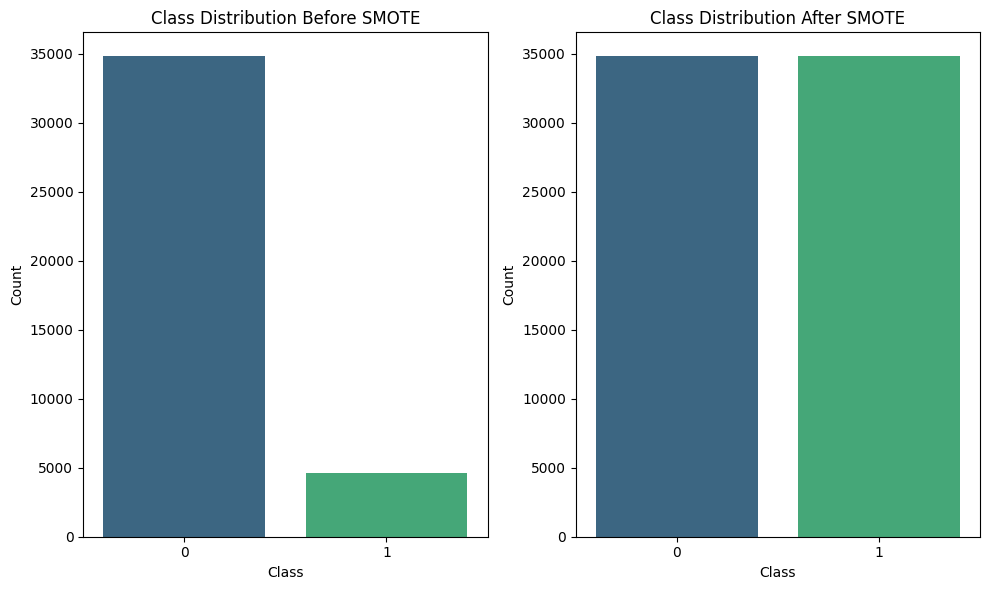

In [82]:
# Class distribution before and after SMOTE
plt.figure(figsize=(10, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette="viridis", legend=False)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, hue=y_resampled, palette="viridis", legend=False)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


**Test - Train Split**

In [83]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


In [84]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
# Display summary of the prepared dataset
print("\nTraining Dataset (X_train) Shape:", X_train.shape)
print("Test Dataset (X_test) Shape:", X_test.shape)
print("Training Target (y_train) Distribution:")
print(y_train.value_counts())
print("\nTest Target (y_test) Distribution:")
print(y_test.value_counts())


Training Dataset (X_train) Shape: (48728, 46)
Test Dataset (X_test) Shape: (20884, 46)
Training Target (y_train) Distribution:
y
1    24364
0    24364
Name: count, dtype: int64

Test Target (y_test) Distribution:
y
0    10442
1    10442
Name: count, dtype: int64


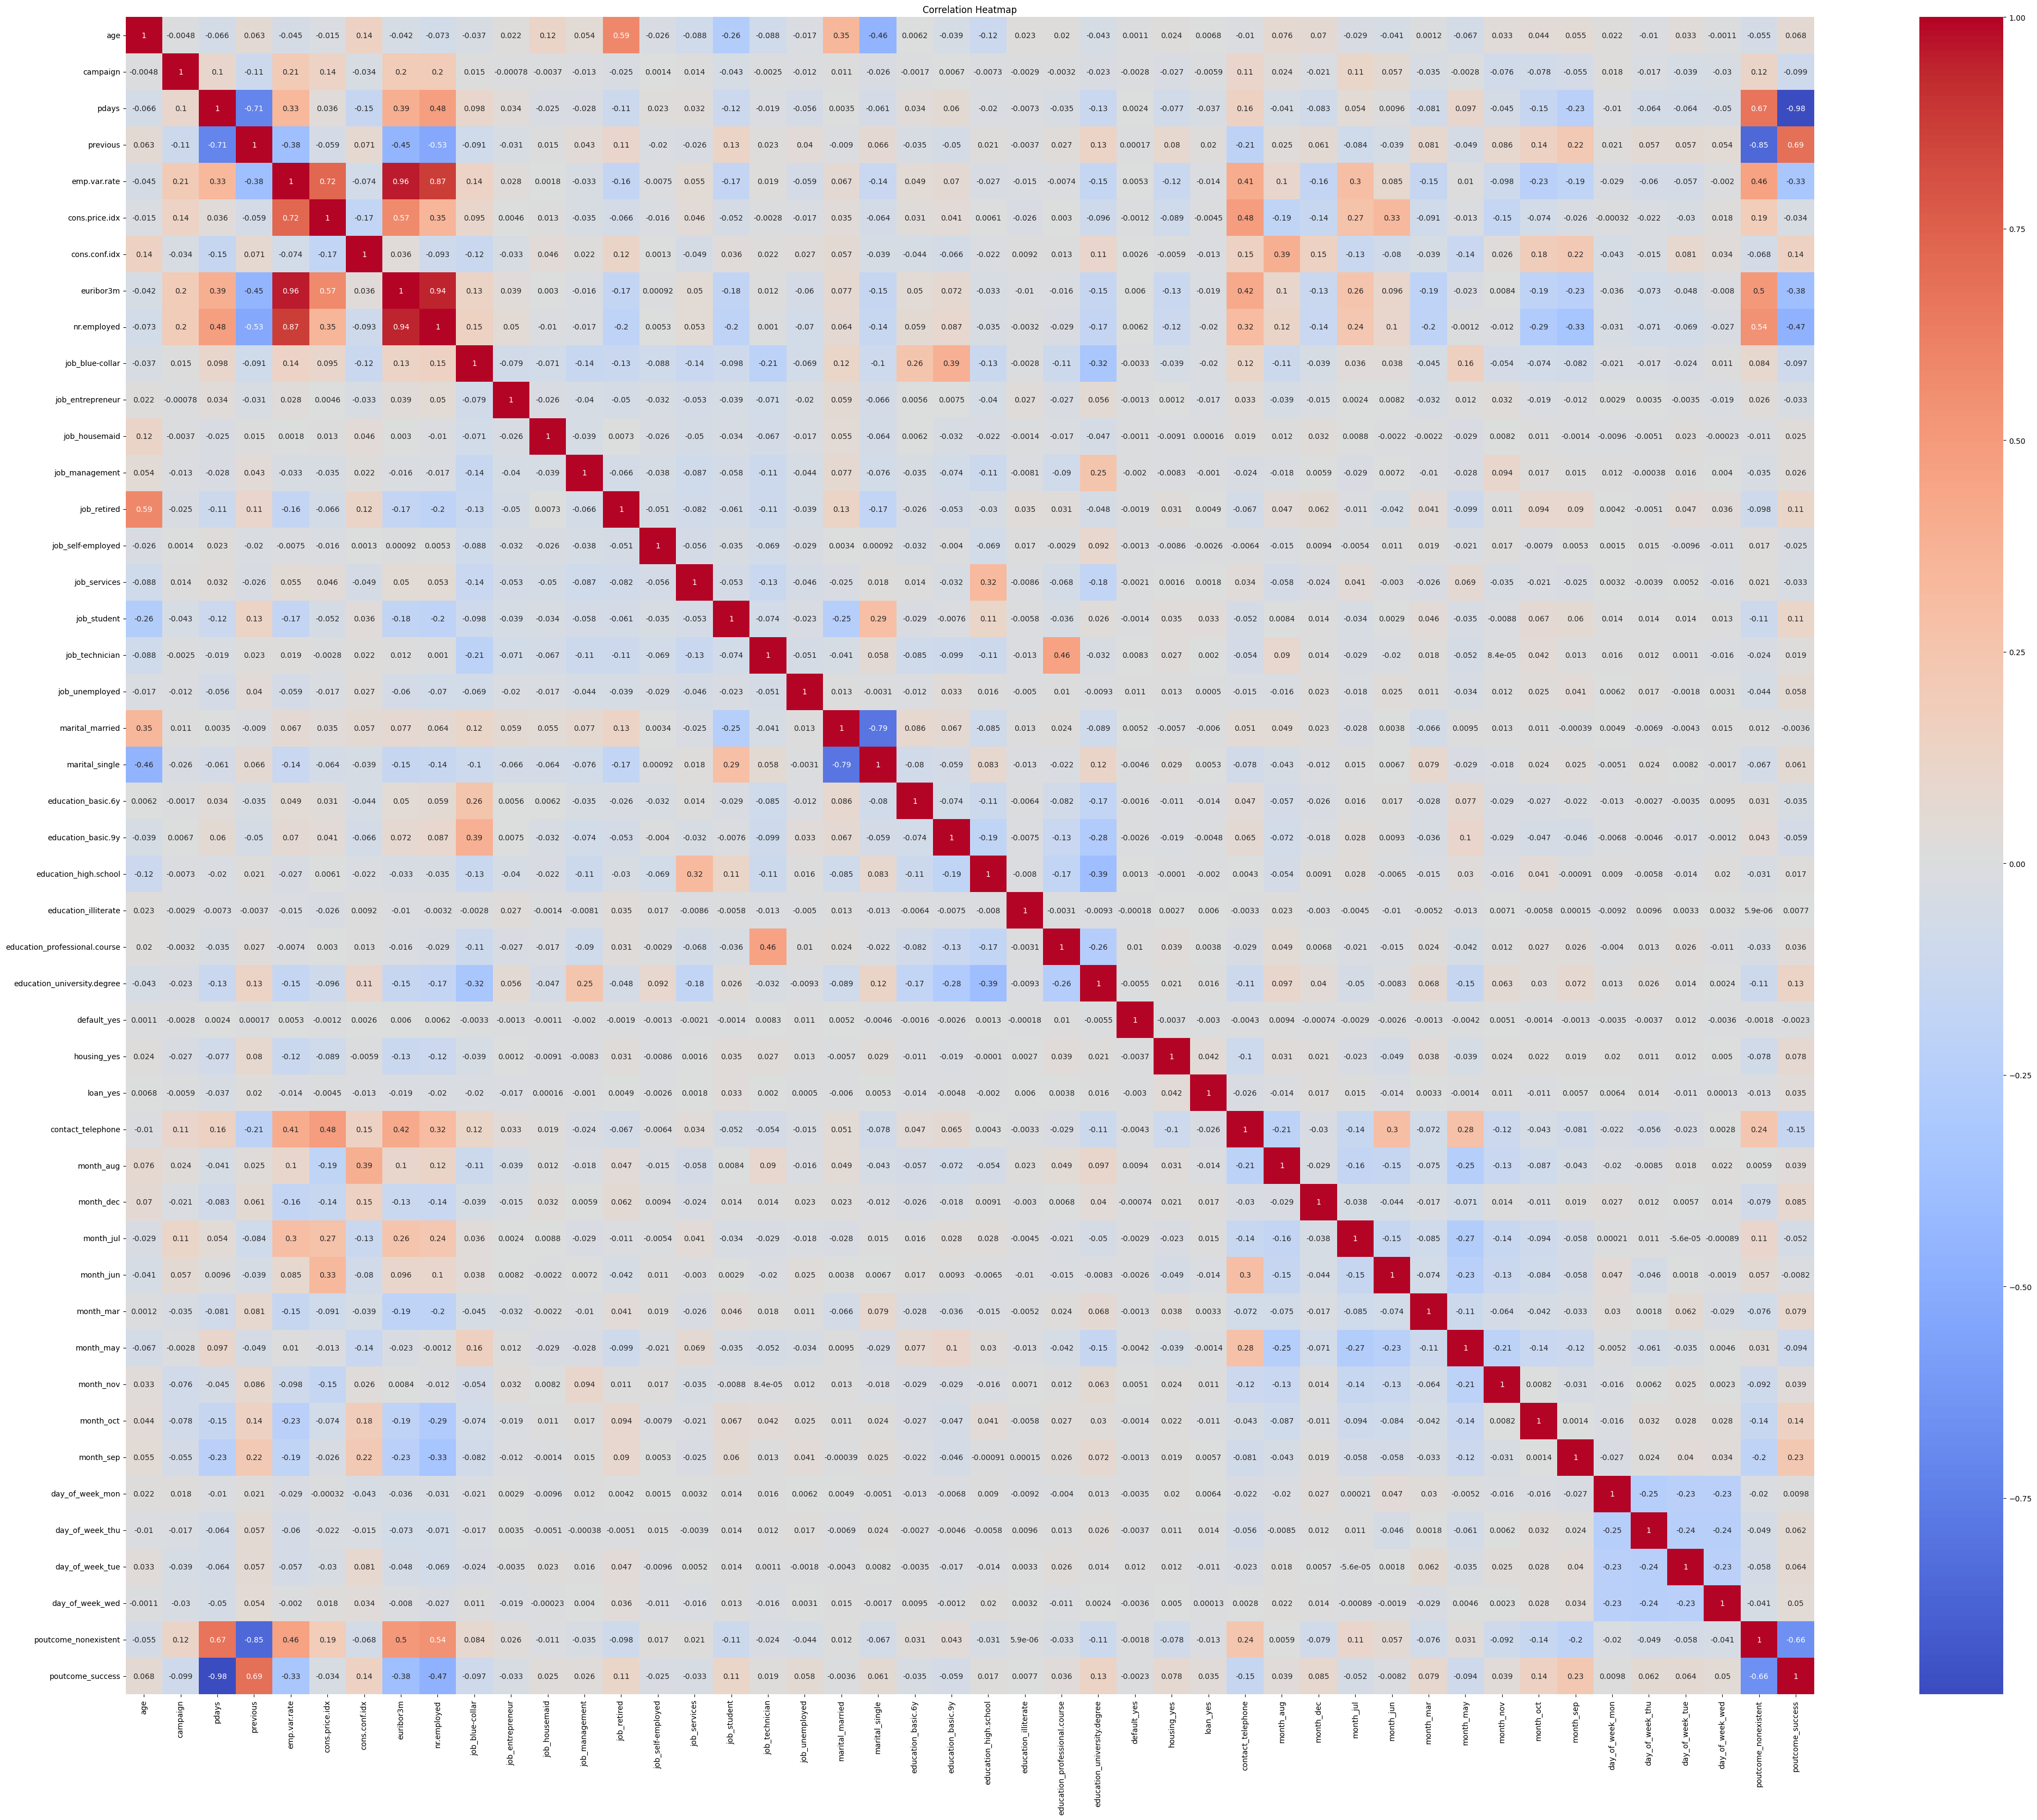

In [86]:
# Visualize correlation heatmap
plt.figure(figsize=(50, 40))
correlation_matrix = pd.DataFrame(X_resampled).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Neural Network Model

Import necessary libraries

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

Define the Neural Network Model

In [88]:
# Define the Neural Network Model
def build_nn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Define the input shape explicitly
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [89]:
# Initialize the model
input_dim = X_train.shape[1]  # Number of features
nn_model = build_nn_model(input_dim)

In [90]:
# Display model summary
print("\nNeural Network Model Summary:")
nn_model.summary()


Neural Network Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           6,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
batch_size = 32
epochs = 30

history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/30
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8408 - loss: 0.3399 - val_accuracy: 0.8460 - val_loss: 0.3409
Epoch 2/30
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8406 - loss: 0.3402 - val_accuracy: 0.8454 - val_loss: 0.3368
Epoch 3/30
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8396 - loss: 0.3408 - val_accuracy: 0.8464 - val_loss: 0.3369
Epoch 4/30
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8419 - loss: 0.3363 - val_accuracy: 0.8479 - val_loss: 0.3344
Epoch 5/30
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8437 - loss: 0.3387 - val_accuracy: 0.8461 - val_loss: 0.3376
Epoch 6/30
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8431 - loss: 0.3311 - val_accuracy: 0.8477 - val_loss: 0.3347
Epoch 7/30
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8443 - loss: 0.3309 - val_accuracy: 0.8497 - val_loss: 0.3347
Epoch 8/30
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8440 - loss: 0.3302 - 

In [93]:
print("\nEvaluating the Neural Network Model on Test Data:")
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the Neural Network Model on Test Data:
Test Loss: 0.3267
Test Accuracy: 0.8563


Generate Preditions and Metrics

In [94]:
# Get predictions
y_pred_proba = nn_model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_proba > 0.5).astype("int32")

# Classification report
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score for Neural Network: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     10442
           1       0.89      0.81      0.85     10442

    accuracy                           0.86     20884
   macro avg       0.86      0.86      0.86     20884
weighted avg       0.86      0.86      0.86     20884

ROC AUC Score for Neural Network: 0.9360

Confusion Matrix:
[[9377 1065]
 [1936 8506]]


# Random Forest Classification

Import necessary libraries

In [95]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Define and Train the Random Forest Model

In [96]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=1000,        # Number of trees in the forest
    max_depth=None,          # Maximum depth of each tree
    random_state=42,         # For reproducibility
    class_weight='balanced'  # Handles class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # For AUC computation

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Classifier Evaluation:
Accuracy: 0.9319
AUC: 0.9799

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10442
           1       0.93      0.94      0.93     10442

    accuracy                           0.93     20884
   macro avg       0.93      0.93      0.93     20884
weighted avg       0.93      0.93      0.93     20884


Confusion Matrix:
[[9647  795]
 [ 628 9814]]


# Comparison of Neural Network and Random Forest Classifier Models

Importing necessary libraries

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    auc,
    roc_auc_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


Create a list of models

In [98]:
# List of models to compare
models = [
    ("Neural Network", nn_model),
    ("Random Forest", rf_model),
]


Display Confusion Matrix of each model

653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Neural Network Evaluation:
Accuracy: 0.8563
AUC: 0.9360

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     10442
           1       0.89      0.81      0.85     10442

    accuracy                           0.86     20884
   macro avg       0.86      0.86      0.86     20884
weighted avg       0.86      0.86      0.86     20884


Confusion Matrix:
[[9377 1065]
 [1936 8506]]


<Figure size 600x600 with 0 Axes>

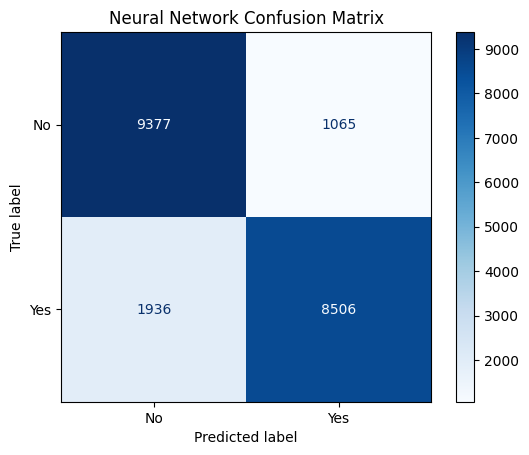


Random Forest Evaluation:
Accuracy: 0.9319
AUC: 0.9799

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10442
           1       0.93      0.94      0.93     10442

    accuracy                           0.93     20884
   macro avg       0.93      0.93      0.93     20884
weighted avg       0.93      0.93      0.93     20884


Confusion Matrix:
[[9647  795]
 [ 628 9814]]


<Figure size 600x600 with 0 Axes>

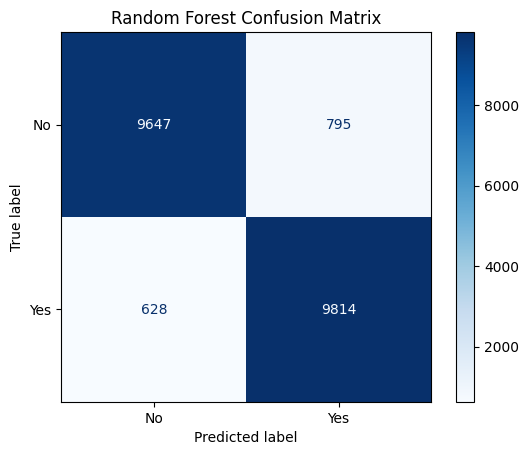

In [99]:
# Compare models
def compare_models(models, X_test, y_test):
    for name, model in models:
        if hasattr(model, "predict_proba"):  # For models like RandomForest
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            y_pred = model.predict(X_test)
        else:  # For Neural Network
            y_pred_proba = model.predict(X_test).ravel()
            y_pred = (y_pred_proba > 0.5).astype("int32")

        # Evaluation Metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Print results
        print(f"\n{name} Evaluation:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC: {auc_score:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(conf_matrix)

        # Display Confusion Matrix for each model
        plt.figure(figsize=(6, 6))
        ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes']).plot(cmap='Blues')
        plt.title(f"{name} Confusion Matrix")
        plt.show()

# Compare the models
compare_models(models, X_test, y_test)



Plot the ROC Curves

653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


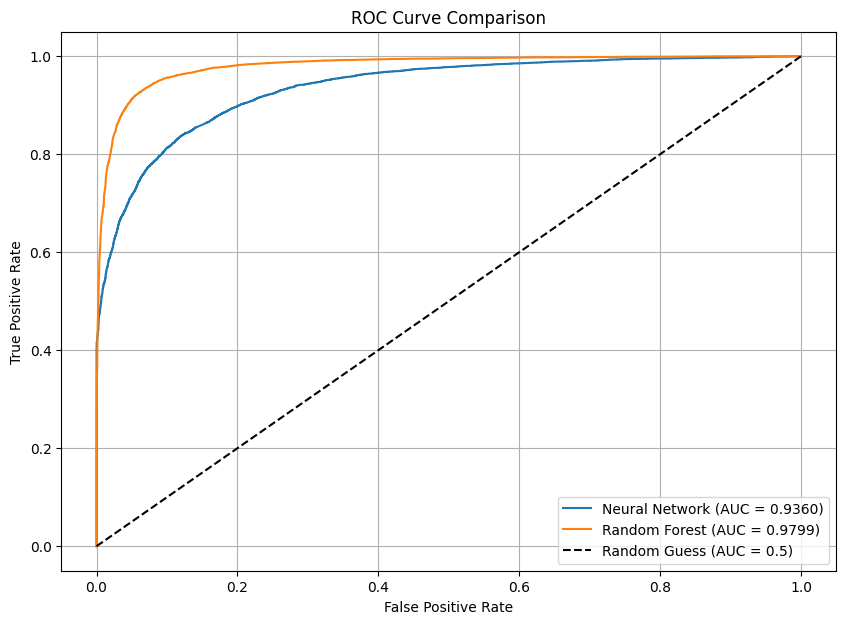

In [100]:
# Plot ROC Curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 7))
    for name, model in models:
        if hasattr(model, "predict_proba"):  # For models like RandomForest
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:  # For Neural Network
            y_pred_proba = model.predict(X_test).ravel()

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.5)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Plot the ROC Curve for all models
plot_roc_curve(models, X_test, y_test)
